In [1]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"
Albermarle_rainfall = pd.read_csv(os.path.join(path, 'Albermarle_rainfall.csv'))
Riding_Mill_water = pd.read_csv(os.path.join(path, 'Riding_Mill_water.csv'))

In [2]:
Albermarle_rainfall['dateTime'] = pd.to_datetime(Albermarle_rainfall['dateTime'])
Riding_Mill_water['dateTime'] = pd.to_datetime(Riding_Mill_water['dateTime'])

In [3]:
Riding_Mill_water.set_index('dateTime', inplace=True)
Albermarle_rainfall.set_index('dateTime', inplace=True)

In [4]:
start_date = pd.to_datetime('11/03/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('05/09/2023 00:00:00', format='%d/%m/%Y %H:%M:%S')
Riding_Mill_water_subset = Riding_Mill_water.loc[(Riding_Mill_water.index >= start_date) & (Riding_Mill_water.index <= end_date)]
Albermarle_rainfall_subset = Albermarle_rainfall.loc[(Albermarle_rainfall.index >= start_date) & (Albermarle_rainfall.index <= end_date)]

In [5]:
Albermarle_rainfall_subset.shape

(122209, 1)

In [6]:
Riding_Mill_water_subset.shape

(122209, 1)

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
merged_data = pd.merge(Albermarle_rainfall_subset, Riding_Mill_water_subset, on='dateTime', how='inner')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data = scaler.fit_transform(merged_data)

In [10]:
train_data = merged_data[:97767]
test_data = merged_data[97767:]

In [12]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
lr_Riding_Mill_96in_48out = LinearRegression()
cv_scores_Riding_Mill_96in_48out_lr = cross_val_score(lr_Riding_Mill_96in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [14]:
cv_scores_Riding_Mill_96in_48out_lr = -cv_scores_Riding_Mill_96in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_96in_48out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_96in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_96in_48out_lr.std())

Cross-validation scores:
[0.00307781 0.00180351 0.00213466 0.00175288 0.00206564]
Mean MSE: 0.002166898847681179
Standard Deviation MSE: 0.000478438936865358


In [15]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [16]:
lr_Riding_Mill_48in_48out = LinearRegression()
cv_scores_Riding_Mill_48in_48out_lr = cross_val_score(lr_Riding_Mill_48in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [17]:
cv_scores_Riding_Mill_48in_48out_lr = -cv_scores_Riding_Mill_48in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_48in_48out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_48in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_48in_48out_lr.std())

Cross-validation scores:
[0.00311229 0.00182816 0.00216905 0.00180381 0.00217886]
Mean MSE: 0.002218433490611428
Standard Deviation MSE: 0.0004748088016816485


In [18]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [19]:
lr_Riding_Mill_24in_48out = LinearRegression()
cv_scores_Riding_Mill_24in_48out_lr = cross_val_score(lr_Riding_Mill_24in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [20]:
cv_scores_Riding_Mill_24in_48out_lr = -cv_scores_Riding_Mill_24in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_24in_48out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_24in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_24in_48out_lr.std())

Cross-validation scores:
[0.00320378 0.00182379 0.00218217 0.0018213  0.00218539]
Mean MSE: 0.002243287683826088
Standard Deviation MSE: 0.0005066925903119636


Now try the different window size 24,48,96 for 32output

In [21]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [22]:
lr_Riding_Mill_96in_32out = LinearRegression()
cv_scores_Riding_Mill_96in_32out_lr = cross_val_score(lr_Riding_Mill_96in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [23]:
cv_scores_Riding_Mill_96in_32out_lr = -cv_scores_Riding_Mill_96in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_96in_32out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_96in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_96in_32out_lr.std())

Cross-validation scores:
[0.00164792 0.00112537 0.00134005 0.00112788 0.00140643]
Mean MSE: 0.001329530715375836
Standard Deviation MSE: 0.0001948026429415919


In [24]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [25]:
lr_Riding_Mill_48in_32out = LinearRegression()
cv_scores_Riding_Mill_48in_32out_lr = cross_val_score(lr_Riding_Mill_48in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [26]:
cv_scores_Riding_Mill_48in_32out_lr = -cv_scores_Riding_Mill_48in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_48in_32out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_48in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_48in_32out_lr.std())

Cross-validation scores:
[0.00165235 0.00113806 0.00135513 0.00114174 0.00145235]
Mean MSE: 0.0013479245967086384
Standard Deviation MSE: 0.00019503146084458542


In [27]:
window_size = 24
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [28]:
lr_Riding_Mill_24in_32out = LinearRegression()
cv_scores_Riding_Mill_24in_32out_lr = cross_val_score(lr_Riding_Mill_24in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [29]:
cv_scores_Riding_Mill_24in_32out_lr = -cv_scores_Riding_Mill_24in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_24in_32out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_24in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_24in_32out_lr.std())

Cross-validation scores:
[0.00169716 0.00113401 0.00134101 0.00115197 0.00146214]
Mean MSE: 0.0013572602537836325
Standard Deviation MSE: 0.0002091789725772837


Now try the different window size 24,48,96 for 16output

In [30]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [31]:
lr_Riding_Mill_96in_16out = LinearRegression()
cv_scores_Riding_Mill_96in_16out_lr = cross_val_score(lr_Riding_Mill_96in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [32]:
cv_scores_Riding_Mill_96in_16out_lr = -cv_scores_Riding_Mill_96in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_96in_16out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_96in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_96in_16out_lr.std())

Cross-validation scores:
[0.00044843 0.00041708 0.00054042 0.00042642 0.0006415 ]
Mean MSE: 0.0004947682026614468
Standard Deviation MSE: 8.540283245811676e-05


In [33]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [34]:
lr_Riding_Mill_48in_16out = LinearRegression()
cv_scores_Riding_Mill_48in_16out_lr = cross_val_score(lr_Riding_Mill_48in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [53]:
cv_scores_Riding_Mill_48in_16out_lr = -cv_scores_Riding_Mill_48in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_48in_16out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_48in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_48in_16out_lr.std())

Cross-validation scores:
[0.00044824 0.00041954 0.00053808 0.00042612 0.00064918]
Mean MSE: 0.0004962306386324547
Standard Deviation MSE: 8.745754100497342e-05


In [50]:
window_size = 24
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [37]:
lr_Riding_Mill_24in_16out = LinearRegression()
cv_scores_Riding_Mill_24in_16out_lr = cross_val_score(lr_Riding_Mill_24in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [38]:
cv_scores_Riding_Mill_24in_16out_lr = -cv_scores_Riding_Mill_24in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_24in_16out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_24in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_24in_16out_lr.std())

Cross-validation scores:
[0.00046078 0.00042055 0.00053673 0.00042552 0.00065409]
Mean MSE: 0.0004995326698366541
Standard Deviation MSE: 8.773816668887676e-05


Now try the different window size 24,48,96 for 8output

In [39]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [40]:
lr_Riding_Mill_96in_8out = LinearRegression()
cv_scores_Riding_Mill_96in_8out_lr = cross_val_score(lr_Riding_Mill_96in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [42]:
cv_scores_Riding_Mill_96in_8out_lr = -cv_scores_Riding_Mill_96in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_96in_8out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_96in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_96in_8out_lr.std())

Cross-validation scores:
[9.34370839e-05 1.30897818e-04 1.63623231e-04 1.16838665e-04
 2.37771823e-04]
Mean MSE: 0.00014851372424287457
Standard Deviation MSE: 5.0084670869125575e-05


In [43]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [44]:
lr_Riding_Mill_48in_8out = LinearRegression()
cv_scores_Riding_Mill_48in_8out_lr = cross_val_score(lr_Riding_Mill_48in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [45]:
cv_scores_Riding_Mill_48in_8out_lr = -cv_scores_Riding_Mill_48in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_48in_8out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_48in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_48in_8out_lr.std())

Cross-validation scores:
[9.38676243e-05 1.31116786e-04 1.62744390e-04 1.16525263e-04
 2.38560461e-04]
Mean MSE: 0.00014856290480933708
Standard Deviation MSE: 5.0245449198623947e-05


In [46]:
window_size = 24
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [47]:
lr_Riding_Mill_24in_8out = LinearRegression()
cv_scores_Riding_Mill_24in_8out_lr = cross_val_score(lr_Riding_Mill_24in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [48]:
cv_scores_Riding_Mill_24in_8out_lr = -cv_scores_Riding_Mill_24in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Riding_Mill_24in_8out_lr)
print("Mean MSE:", cv_scores_Riding_Mill_24in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Riding_Mill_24in_8out_lr.std())

Cross-validation scores:
[9.58681354e-05 1.31406686e-04 1.63086345e-04 1.15685183e-04
 2.39225599e-04]
Mean MSE: 0.0001490543899129039
Standard Deviation MSE: 5.0162666950931486e-05


In [ ]:
cv_scores_Riding_Mill_96in_48out_lr

In [ ]:
cv_scores_Riding_Mill_96in_32out_lr

In [ ]:
cv_scores_Riding_Mill_96in_16out_lr

In [ ]:
cv_scores_Riding_Mill_96in_8out_lr

In [58]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [59]:
lr_Riding_Mill_96in_48out_1 = LinearRegression()

In [60]:
lr_Riding_Mill_96in_48out_1.fit(X_train, y_train)

LinearRegression()

In [61]:
pred_lr_Riding_Mill_96in_48out = lr_Riding_Mill_96in_48out_1.predict(X_test)

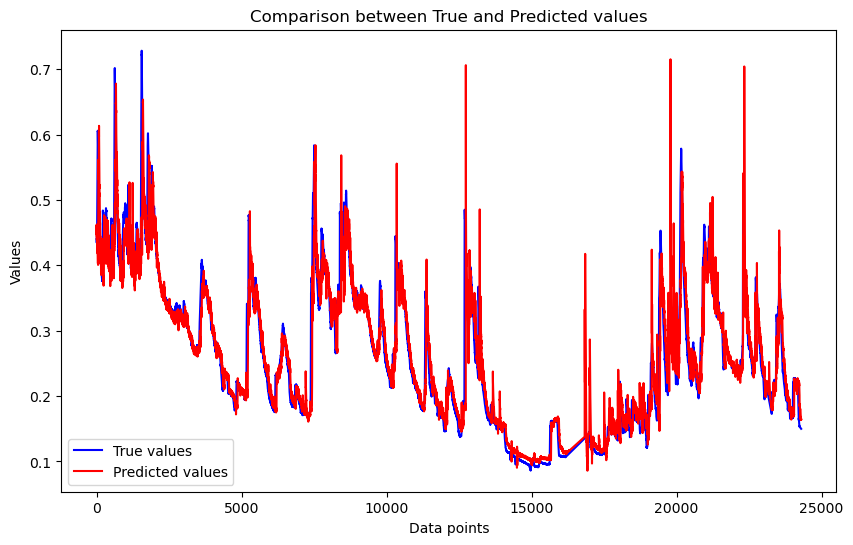

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Riding_Mill_96in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [63]:
def nse(y_test, pred_lr_Riding_Mill_96in_48out):
    numerator = np.sum((y_test - pred_lr_Riding_Mill_96in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Riding_Mill_96in_48out)
mae = mean_absolute_error(y_test, pred_lr_Riding_Mill_96in_48out)
nse_value = nse(y_test, pred_lr_Riding_Mill_96in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0016254393610786815
MAE: 0.02331047189938584
NSE: 0.8719785361874428


In [83]:
from joblib import dump
dump(lr_Riding_Mill_96in_48out_1, 'lr_Riding_Mill_96in_48out.joblib')

['lr_Riding_Mill_96in_48out.joblib']

In [65]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [66]:
lr_Riding_Mill_96in_32out = LinearRegression()
lr_Riding_Mill_96in_32out.fit(X_train, y_train)

LinearRegression()

In [67]:
pred_lr_Riding_Mill_96in_32out = lr_Riding_Mill_96in_32out.predict(X_test)

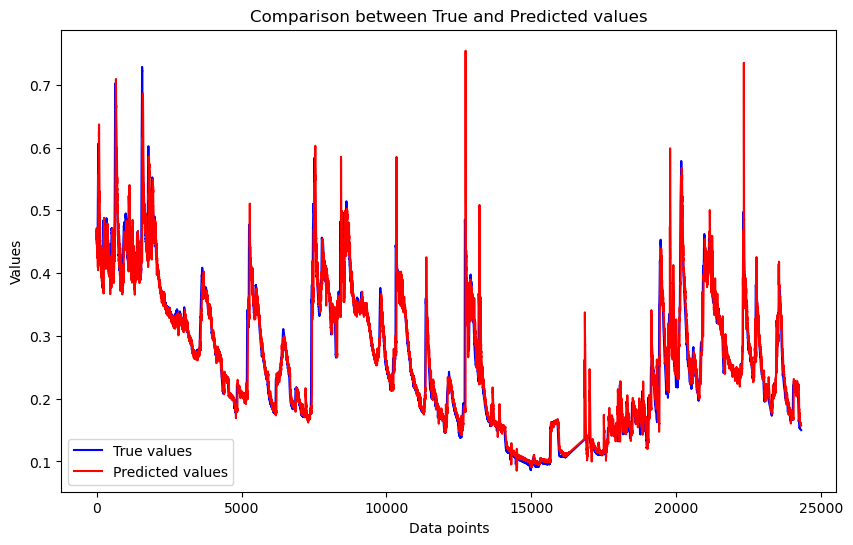

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Riding_Mill_96in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [69]:
def nse(y_test, pred_lr_Riding_Mill_96in_32out):
    numerator = np.sum((y_test - pred_lr_Riding_Mill_96in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Riding_Mill_96in_32out)
mae = mean_absolute_error(y_test, pred_lr_Riding_Mill_96in_32out)
nse_value = nse(y_test, pred_lr_Riding_Mill_96in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0009897418050684203
MAE: 0.016875857014824157
NSE: 0.9221379319056675


In [70]:
from joblib import dump
dump(lr_Riding_Mill_96in_32out, 'lr_Riding_Mill_96in_32out.joblib')

['lr_Riding_Mill_96in_32out.joblib']

In [71]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [72]:
lr_Riding_Mill_96in_16out = LinearRegression()
lr_Riding_Mill_96in_16out.fit(X_train, y_train)

LinearRegression()

In [73]:
pred_lr_Riding_Mill_96in_16out = lr_Riding_Mill_96in_16out.predict(X_test)

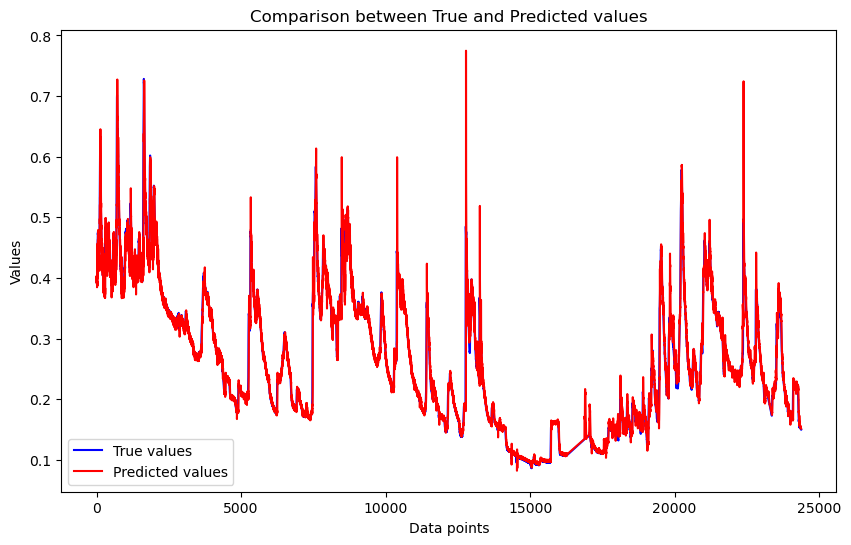

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Riding_Mill_96in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [75]:
def nse(y_test, pred_lr_Riding_Mill_96in_16out):
    numerator = np.sum((y_test - pred_lr_Riding_Mill_96in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Riding_Mill_96in_16out)
mae = mean_absolute_error(y_test, pred_lr_Riding_Mill_96in_16out)
nse_value = nse(y_test, pred_lr_Riding_Mill_96in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00037789151126603243
MAE: 0.008969031909909261
NSE: 0.9703934744759649


In [76]:
from joblib import dump
dump(lr_Riding_Mill_96in_16out, 'lr_Riding_Mill_96in_16out.joblib')

['lr_Riding_Mill_96in_16out.joblib']

In [77]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [78]:
lr_Riding_Mill_96in_8out = LinearRegression()
lr_Riding_Mill_96in_8out.fit(X_train, y_train)

LinearRegression()

In [79]:
pred_lr_Riding_Mill_96in_8out = lr_Riding_Mill_96in_8out.predict(X_test)

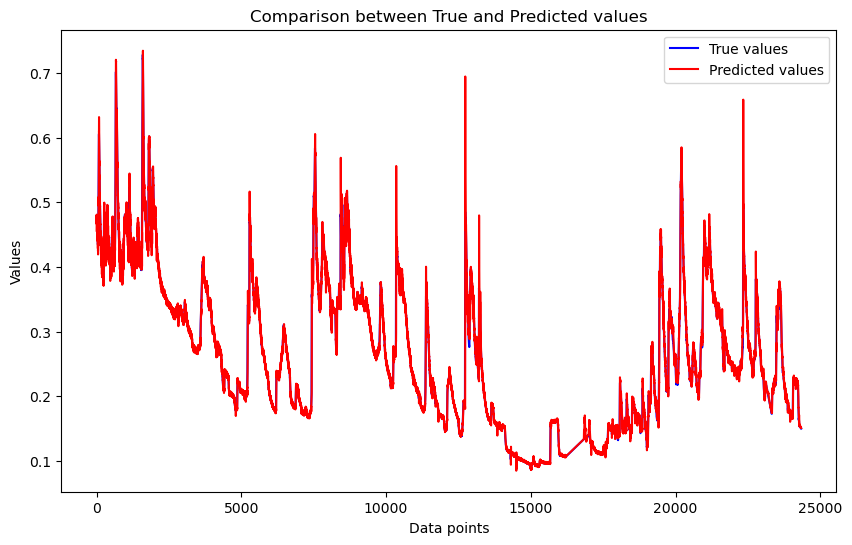

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Riding_Mill_96in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [81]:
def nse(y_test, pred_lr_Riding_Mill_96in_8out):
    numerator = np.sum((y_test - pred_lr_Riding_Mill_96in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Riding_Mill_96in_8out)
mae = mean_absolute_error(y_test, pred_lr_Riding_Mill_96in_8out)
nse_value = nse(y_test, pred_lr_Riding_Mill_96in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00011893567636598988
MAE: 0.004467546004968689
NSE: 0.9906655169954997


In [82]:
dump(lr_Riding_Mill_96in_8out, 'lr_Riding_Mill_96in_8out.joblib')

['lr_Riding_Mill_96in_8out.joblib']